  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64

Accuracy: 0.9834888729361091

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.93      0.95      0.94       186

    accuracy                           0.98      1393
   macro avg       0.96      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393


Confusion Matrix:
 [[1193   14]
 [   9  177]]


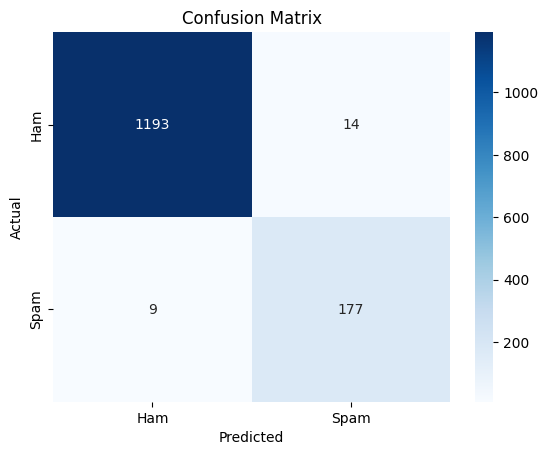

In [1]:
# SPAM EMAIL DETECTION USING MACHINE LEARNING

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
# Using built-in dataset from UCI (SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Step 3: Explore Dataset
print(df.head())
print("\nClass distribution:\n", df['label'].value_counts())

# Step 4: Preprocessing
# Convert labels to binary (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 5: Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 7: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()